In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3552, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 103,2.25,6367.0,3,5,3+,10.0,Relatively New,3534.0,0,0,0,0,0,2,0
1,flat,vatika emilia floors,sector 83,0.65,6190.0,2,2,2,1.0,Relatively New,950.0,0,0,0,0,0,1,174
2,flat,paras dews,sector 106,1.25,10656.0,3,4,3,14.0,Relatively New,1305.0,1,1,0,0,0,2,167
3,flat,emaar gurgaon greens,sector 102,1.30,7879.0,3,3,3,4.0,Relatively New,1311.0,0,1,0,0,0,1,125
4,house,signature global city,sector 37d,1.27,8089.0,3,3,3,4.0,Relatively New,1570.0,0,0,0,1,0,2,89


In [6]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 103,2.25,3,5,3+,10.0,Relatively New,3534.0,0,0,0,0,0,2,0
1,flat,sector 83,0.65,2,2,2,1.0,Relatively New,950.0,0,0,0,0,0,1,174
2,flat,sector 106,1.25,3,4,3,14.0,Relatively New,1305.0,1,1,0,0,0,2,167
3,flat,sector 102,1.30,3,3,3,4.0,Relatively New,1311.0,0,1,0,0,0,1,125
4,house,sector 37d,1.27,3,3,3,4.0,Relatively New,1570.0,0,0,0,1,0,2,89


# luxury_score

<Axes: >

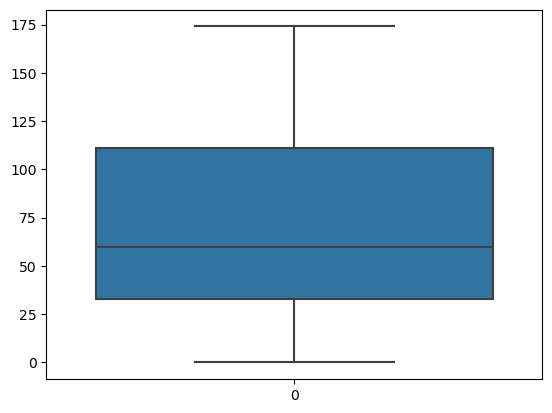

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def luxury_category(score):
    if 0 <= score < 50:
        return 'low'
    elif 50 <= score < 150:
        return 'medium'
    elif 150 <= score <= 175:
        return 'High'
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(luxury_category)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 103,2.25,3,5,3+,10.0,Relatively New,3534.0,0,0,0,0,0,2,0,low
1,flat,sector 83,0.65,2,2,2,1.0,Relatively New,950.0,0,0,0,0,0,1,174,High
2,flat,sector 106,1.25,3,4,3,14.0,Relatively New,1305.0,1,1,0,0,0,2,167,High
3,flat,sector 102,1.30,3,3,3,4.0,Relatively New,1311.0,0,1,0,0,0,1,125,medium
4,house,sector 37d,1.27,3,3,3,4.0,Relatively New,1570.0,0,0,0,1,0,2,89,medium


# floorNum

<Axes: >

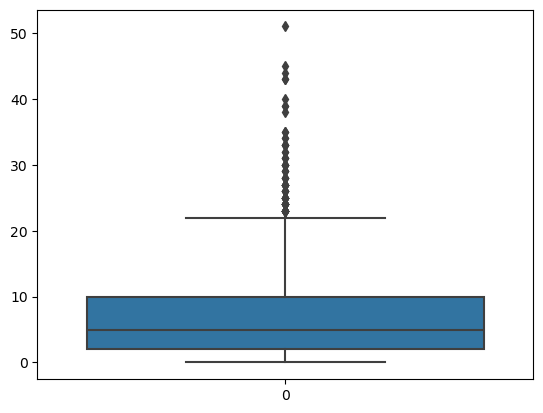

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 103,2.25,3,5,3+,10.0,Relatively New,3534.0,0,0,0,0,0,2,0,low,Mid Floor
1,flat,sector 83,0.65,2,2,2,1.0,Relatively New,950.0,0,0,0,0,0,1,174,High,Low Floor
2,flat,sector 106,1.25,3,4,3,14.0,Relatively New,1305.0,1,1,0,0,0,2,167,High,High Floor
3,flat,sector 102,1.30,3,3,3,4.0,Relatively New,1311.0,0,1,0,0,0,1,125,medium,Mid Floor
4,house,sector 37d,1.27,3,3,3,4.0,Relatively New,1570.0,0,0,0,1,0,2,89,medium,Mid Floor


In [16]:
train_df = train_df.drop(columns = ['floorNum', 'luxury_score' ])

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 103,2.25,3,5,3+,Relatively New,3534.0,0,0,0,0,0,2,low,Mid Floor
1,flat,sector 83,0.65,2,2,2,Relatively New,950.0,0,0,0,0,0,1,High,Low Floor
2,flat,sector 106,1.25,3,4,3,Relatively New,1305.0,1,1,0,0,0,2,High,High Floor
3,flat,sector 102,1.30,3,3,3,Relatively New,1311.0,0,1,0,0,0,1,medium,Mid Floor
4,house,sector 37d,1.27,3,3,3,Relatively New,1570.0,0,0,0,1,0,2,medium,Mid Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
# create a copy of the orignial data for label encoding 
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include =['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:

X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,7.0,3,5,4.0,3.0,3534.0,0,0,0,0,0,2,1.0,2.0
1,0.0,97.0,2,2,2.0,3.0,950.0,0,0,0,0,0,1,0.0,1.0
2,0.0,10.0,3,4,3.0,3.0,1305.0,1,1,0,0,0,2,0.0,0.0
3,0.0,6.0,3,3,3.0,3.0,1311.0,0,1,0,0,0,1,2.0,2.0
4,1.0,46.0,3,3,3.0,3.0,1570.0,0,0,0,1,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,99.0,4,4,3.0,3.0,2600.0,0,0,0,0,0,2,1.0,2.0
3548,0.0,99.0,2,2,4.0,3.0,1376.0,0,0,1,0,0,2,2.0,0.0
3549,0.0,106.0,2,2,4.0,3.0,1299.0,0,0,0,0,1,1,1.0,2.0
3550,0.0,72.0,4,6,3.0,3.0,3921.0,0,1,0,1,0,1,2.0,0.0


In [21]:
y_label

0       2.25
1       0.65
2       1.25
3       1.30
4       1.27
        ... 
3547    2.13
3548    1.20
3549    0.89
3550    9.95
3551    1.24
Name: price, Length: 3552, dtype: float64

# 8 Feature Selection Techniques

# 1. Correlation Analysis

<Axes: >

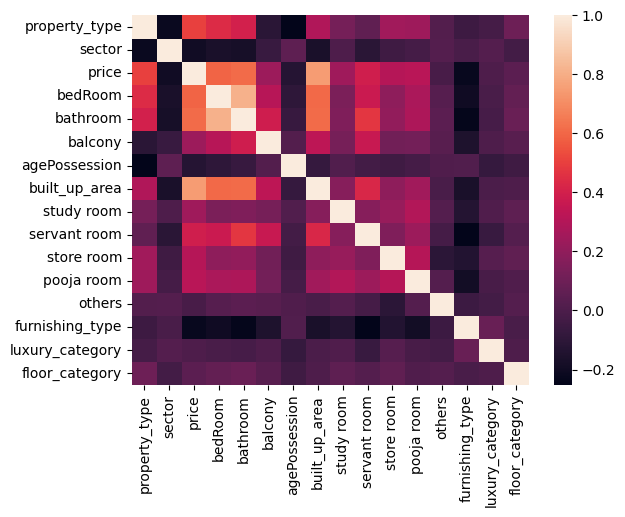

In [22]:
 sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,property_type,0.503622
1,sector,-0.196625
2,price,1.000000
3,bedRoom,0.591129
4,bathroom,0.609625
5,balcony,0.236119
6,agePossession,-0.129481
7,built_up_area,0.748901
8,study room,0.242799
9,servant room,0.391728


# 2. Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649453
0,property_type,0.102713
1,sector,0.102631
3,bathroom,0.027698
2,bedRoom,0.024113
8,servant room,0.016910
5,agePossession,0.014627
4,balcony,0.012067
12,furnishing_type,0.010701
7,study room,0.008699


# 3. Gradient Boosting Feature importances

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.686733
0,property_type,0.098216
1,sector,0.096843
2,bedRoom,0.037231
3,bathroom,0.034280
8,servant room,0.022429
9,store room,0.009906
5,agePossession,0.004183
12,furnishing_type,0.003686
7,study room,0.003361


# 4. Permutation Importance

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.750732
0,property_type,0.224065
1,sector,0.162886
2,bedRoom,0.032507
8,servant room,0.018941
3,bathroom,0.015890
4,balcony,0.005767
7,study room,0.004297
13,luxury_category,0.001364
9,store room,0.001224


# 5. LASSO

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.508100
0,property_type,0.724503
3,bathroom,0.265755
9,store room,0.196170
7,study room,0.168751
8,servant room,0.153521
10,pooja room,0.073194
13,luxury_category,0.053002
2,bedRoom,0.010887
4,balcony,-0.000000


# 6. RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.649688
0,property_type,0.105241
1,sector,0.101066
3,bathroom,0.025729
2,bedRoom,0.023991
8,servant room,0.018814
5,agePossession,0.015087
4,balcony,0.012198
12,furnishing_type,0.009637
9,store room,0.008817


# 7. Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.509509
0,property_type,0.725062
3,bathroom,0.269267
9,store room,0.199945
7,study room,0.176015
8,servant room,0.159222
10,pooja room,0.076311
13,luxury_category,0.063491
2,bedRoom,0.012793
4,balcony,-0.010259


# 8. SHAP

In [30]:

!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 7.95216881e-01, -1.40043331e+00, -3.24283137e-01, ...,
        -1.86552774e-02, -4.36336168e-02, -2.10643681e-02],
       [-1.82253870e-01, -3.04904309e-01, -4.78901277e-02, ...,
         9.71428782e-03,  4.90627316e-03, -7.04289995e-03],
       [-2.65750064e-01, -2.02992599e-01, -2.21237868e-02, ...,
        -1.22484902e-02,  1.31269936e-02,  5.58364550e-02],
       ...,
       [-2.14093651e-01, -4.80083973e-01, -6.73917781e-02, ...,
         3.30164926e-03,  3.62292835e-05, -4.37656061e-03],
       [-4.42111457e-01,  1.21118894e+00,  9.59290892e-02, ...,
         5.02764703e-02,  2.91950097e-02, -8.99385408e-03],
       [-2.24119444e-01, -4.81409134e-01, -1.59397981e-02, ...,
         2.17767597e-02,  2.06117724e-02, -2.85264469e-03]])

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.250950
0,property_type,0.481047
1,sector,0.384460
3,bathroom,0.117323
8,servant room,0.086175
2,bedRoom,0.050867
4,balcony,0.039108
12,furnishing_type,0.025547
14,floor_category,0.024077
5,agePossession,0.023821


In [33]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [34]:

final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.503622,0.102713,0.098216,0.224065,0.724503,0.105241,0.725062,0.481047
sector,-0.196625,0.102631,0.096843,0.162886,-0.048194,0.101066,-0.056720,0.384460
bedRoom,0.591129,0.024113,0.037231,0.032507,0.010887,0.023991,0.012793,0.050867
bathroom,0.609625,0.027698,0.034280,0.015890,0.265755,0.025729,0.269267,0.117323
balcony,0.236119,0.012067,0.001764,0.005767,-0.000000,0.012198,-0.010259,0.039108
agePossession,-0.129481,0.014627,0.004183,0.000973,-0.017155,0.015087,-0.025038,0.023821
built_up_area,0.748901,0.649453,0.686733,0.750732,1.508100,0.649688,1.509509,1.250950
study room,0.242799,0.008699,0.003361,0.004297,0.168751,0.006601,0.176015,0.021034
servant room,0.391728,0.016910,0.022429,0.018941,0.153521,0.018814,0.159222,0.086175


In [35]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_score', 'SHAP_score']].mean(axis=1).sort_values(ascending= False )

feature
built_up_area      0.618362
property_type      0.135678
sector             0.116946
bathroom           0.029333
bedRoom            0.026386
servant room       0.021486
balcony            0.009214
agePossession      0.008804
furnishing_type    0.006929
store room         0.006604
study room         0.006084
floor_category     0.004558
luxury_category    0.004524
pooja room         0.003628
others             0.001464
dtype: float64

In [37]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,7.0,3,5,4.0,3.0,3534.0,0,0,0,0,0,2,1.0,2.0
1,0.0,97.0,2,2,2.0,3.0,950.0,0,0,0,0,0,1,0.0,1.0
2,0.0,10.0,3,4,3.0,3.0,1305.0,1,1,0,0,0,2,0.0,0.0
3,0.0,6.0,3,3,3.0,3.0,1311.0,0,1,0,0,0,1,2.0,2.0
4,1.0,46.0,3,3,3.0,3.0,1570.0,0,0,0,1,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,99.0,4,4,3.0,3.0,2600.0,0,0,0,0,0,2,1.0,2.0
3548,0.0,99.0,2,2,4.0,3.0,1376.0,0,0,1,0,0,2,2.0,0.0
3549,0.0,106.0,2,2,4.0,3.0,1299.0,0,0,0,0,1,1,1.0,2.0
3550,0.0,72.0,4,6,3.0,3.0,3921.0,0,1,0,1,0,1,2.0,0.0


In [38]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [39]:

scores.mean()

0.8122258124591459

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [41]:
scores.mean()

0.8120412316157383

In [42]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [43]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [44]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,7.0,3,5,4.0,3.0,3534.0,0,0,2,1.0,2.0,2.25
1,0.0,97.0,2,2,2.0,3.0,950.0,0,0,1,0.0,1.0,0.65
2,0.0,10.0,3,4,3.0,3.0,1305.0,1,0,2,0.0,0.0,1.25
3,0.0,6.0,3,3,3.0,3.0,1311.0,1,0,1,2.0,2.0,1.30
4,1.0,46.0,3,3,3.0,3.0,1570.0,0,0,2,2.0,2.0,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,99.0,4,4,3.0,3.0,2600.0,0,0,2,1.0,2.0,2.13
3548,0.0,99.0,2,2,4.0,3.0,1376.0,0,1,2,2.0,0.0,1.20
3549,0.0,106.0,2,2,4.0,3.0,1299.0,0,0,1,1.0,2.0,0.89
3550,0.0,72.0,4,6,3.0,3.0,3921.0,1,0,1,2.0,0.0,9.95
